In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing the data

In [2]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!mkdir './data'
!wget $data_url -P './data'

mkdir: cannot create directory ‘./data’: File exists
--2022-06-14 10:55:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘./data/AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  11.2MB/s    in 0.6s    

2022-06-14 10:55:43 (11.2 MB/s) - ‘./data/AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [6]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
print ( df.shape )
df.columns

(48895, 16)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them and fill in the missing values with 0.

In [17]:
feature_columns = ['neighbourhood_group', 'room_type', 'latitude', 'longitude',
'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
'availability_365']
print( df[feature_columns].isna().sum() )
#df.isnull().sum()

df[feature_columns] = df[feature_columns].fillna(0)
df_sel = df[feature_columns]
df_sel.head()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

In [33]:
print(df_sel['neighbourhood_group'].value_counts())
df_sel['neighbourhood_group'].value_counts().head(1)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Manhattan    21661
Name: neighbourhood_group, dtype: int64

Answer: 'Manhattan'

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [34]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop('a', inplace=True, axis=1)

In [88]:
def create_split(df_to_split, train_size=0.6, val_size=0.2, test_size=0.2):
    assert (test_size < 1)
    assert (train_size + val_size + test_size == 1)
    df_full_train, df_test = train_test_split(df_to_split, test_size=test_size, random_state=42)
    df_train, df_val = train_test_split(df_full_train, test_size=val_size/(1-test_size), random_state=42) # 0.25 since df_full_train is already at 0.8 size
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    return df_train, df_val, df_test

def create_targets(dfs, target_column_name):
    to_ret = []
    for df in dfs:
        y = df[target_column_name].values
        new_df = df.drop(target_column_name, inplace=False, axis=1)
        to_ret.append((new_df, y))
    return to_ret


In [96]:
df_train, df_val, df_test = create_split(df_sel)
len(df_train), len(df_val), len(df_test)


(29337, 9779, 9779)

In [97]:
(df_train_no_y, y_train), (df_val_no_y, y_val), (df_test_no_y, y_test) = create_targets((df_train, df_val, df_test), 'price')

In [98]:
df_train_no_y.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Example of a correlation matrix for the car price dataset:

<img src="images/correlation-matrix.png" />

see:
[https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

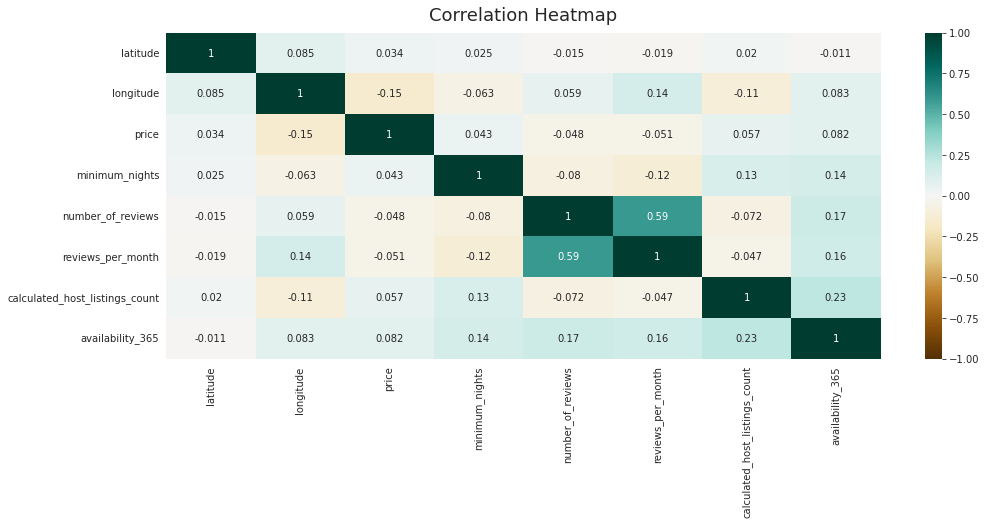

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_sel.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be croppedplt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


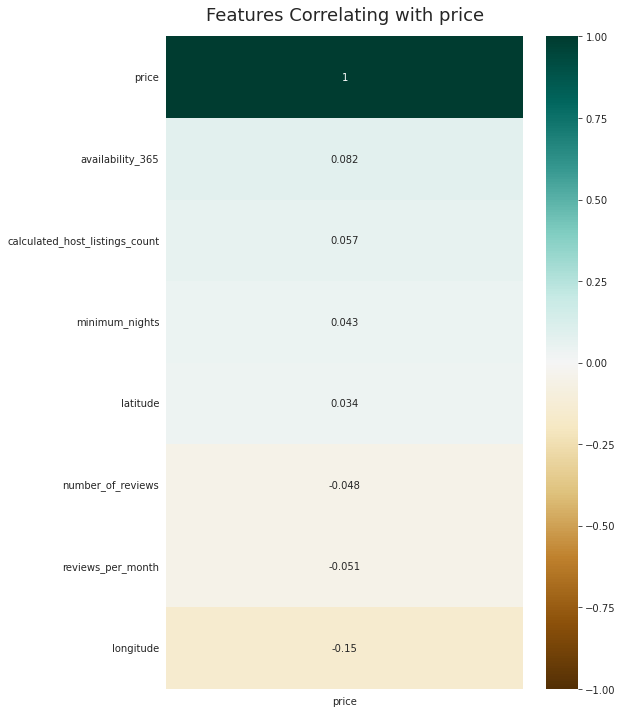

In [45]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_sel.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with price', fontdict={'fontsize':18}, pad=16);


In [47]:
df_sel.corr().unstack().sort_values(ascending = False)


latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
                                                                    ...   
calculated_host_listings_count  longitude                        -0.114713
minimum_nights                  reviews_per_month                -0.124905
reviews_per_month               minimum_nights                   -0.124905
price                           longitude                        -0.150019
longitude                       price                            -0.150019
Length: 64, dtype: float64

Q2 answer:
'reviews_per_month' and 'number of reviews'



### Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.


In [75]:
data_class = df_sel.copy()
mean = data_class['price'].mean()
print(mean )

data_class['above_average'] = np.where(data_class['price'] >= 152, 1, 0)
data_class = data_class.drop('price', axis=1)
data_class.count()

152.7206871868289


neighbourhood_group               48895
room_type                         48895
latitude                          48895
longitude                         48895
minimum_nights                    48895
number_of_reviews                 48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
above_average                     48895
dtype: int64

In [100]:
df_class_train, df_class_val, df_class_test = create_split(data_class)
print(len(df_class_train), len(df_class_val), len(df_class_test))

(df_class_train_no_y, y_train), (df_class_val_no_y, y_val), (df_class_test_no_y, y_test) = create_targets((df_class_train, df_class_val, df_class_test), 'above_average')
df_class_train.head()
df_class_train_no_y.head()

29337 9779 9779


,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67


### Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`


In [83]:
from sklearn.metrics import mutual_info_score

In [117]:
print(data_class.dtypes)
print(data_class.columns.to_list())

categorical = ['neighbourhood_group', 'room_type']
numerical = data_class.columns.to_series()
numerical = numerical.drop(categorical)
print('categorical: ', categorical)
print('numerical: ', numerical.to_list())


neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
above_average                       int64
dtype: object
['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'above_average']
categorical:  ['neighbourhood_group', 'room_type']
numerical:  ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'above_average']


In [106]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_class_train.above_average)

mi = df_class_train[categorical].apply(mutual_info_above_average_score)
mi_df = pd.DataFrame(round(mi.sort_values(ascending=False), 2), columns=['MI'])
mi_df

,MI
room_type,0.14
neighbourhood_group,0.05


Answer: 'room_type' has bigger score - 0.14

### Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.



In [121]:
categorical=  ['neighbourhood_group', 'room_type']
numerical=  ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df_class_train, df_class_val, df_class_test = create_split(data_class)
print(len(df_class_train), len(df_class_val), len(df_class_test))

(df_class_train_no_y, y_train), (df_class_val_no_y, y_val), (df_class_test_no_y, y_test) = create_targets((df_class_train, df_class_val, df_class_test), 'above_average')
df_class_train_no_y.head()

29337 9779 9779


,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67


In [128]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [122]:
dv = DictVectorizer(sparse=False)

train_dict = df_class_train_no_y[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_class_val_no_y[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [136]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

model.fit(X_train, y_train)

val_dict = df_class_val_no_y[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred), 4)
print(accuracy)


0.7816


Answer Q4: accuracy is 0.79

### Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
   * `neighbourhood_group`
   * `room_type`
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive


In [147]:
original_accuracy = accuracy

features = categorical + numerical

print("categorical:", categorical)
print("numerical:", numerical)
print("features:", features)

val_accuracies = []
val_accuracies.append(('all', original_accuracy, 0))

for c in features:
    features_copy = features.copy()

    features_copy.remove(c)

    dv = DictVectorizer(sparse=False)

    train_dict = df_class_train_no_y[features_copy].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_class_val_no_y[features_copy].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

    model.fit(X_train, y_train)

    val_dict = df_class_val_no_y[features_copy].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    accuracy = np.round(accuracy_score(y_val, y_pred), 4)
    difference = original_accuracy - accuracy
    val_accuracies.append((c, accuracy, difference))

    print(f'accuracy when removed feature {c}: {accuracy} , difference: {difference:.6f}')

print(val_accuracies)

categorical: ['neighbourhood_group', 'room_type']
numerical: ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
features: ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
accuracy when removed feature neighbourhood_group: 0.751 , difference: 0.030600
accuracy when removed feature room_type: 0.7163 , difference: 0.065300
accuracy when removed feature latitude: 0.7864 , difference: -0.004800
accuracy when removed feature longitude: 0.7868 , difference: -0.005200
accuracy when removed feature minimum_nights: 0.7857 , difference: -0.004100
accuracy when removed feature number_of_reviews: 0.787 , difference: -0.005400
accuracy when removed feature reviews_per_month: 0.7855 , difference: -0.003900
accuracy when removed feature calculated_host_listings_count: 0.7867 , difference: 

In [149]:
val_accuracies_sorted = sorted(val_accuracies, key=lambda item: item[2])
val_accuracies_sorted

[('number_of_reviews', 0.787, -0.005400000000000071),
 ('longitude', 0.7868, -0.0052000000000000934),
 ('calculated_host_listings_count', 0.7867, -0.005099999999999993),
 ('latitude', 0.7864, -0.0048000000000000265),
 ('minimum_nights', 0.7857, -0.0040999999999999925),
 ('reviews_per_month', 0.7855, -0.0039000000000000146),
 ('all', 0.7816, 0),
 ('availability_365', 0.7816, 0.0),
 ('neighbourhood_group', 0.751, 0.03059999999999996),
 ('room_type', 0.7163, 0.06529999999999991)]

Answer: 'number_of_reviews'

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [153]:
df_sel_log = df_sel.copy()

df_sel_log['price']=np.log1p(df_sel_log['price'])


In [157]:
df_train, df_val, df_test = create_split(df_sel_log)
len(df_train), len(df_val), len(df_test)

(df_train_no_y, y_train), (df_val_no_y, y_val), (df_test_no_y, y_test) = create_targets((df_train, df_val, df_test), 'price')

df_train.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,4.605170,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,4.060443,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,4.262680,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,4.875197,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,4.709530,1,48,1.80,2,67


In [161]:
dv = DictVectorizer(sparse=False)

train_dict = df_train_no_y[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

rmse_scores = []

for alpha in [0, 0.01, 0.1, 1, 10]:

    model = Ridge(alpha=1, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val_no_y[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append((alpha, rmse))

    print(f'alpha: {alpha}, rmse: {rmse:.3f}')

print(rmse_scores)


alpha: 0, rmse: 0.497
alpha: 0.01, rmse: 0.497
alpha: 0.1, rmse: 0.497
alpha: 1, rmse: 0.497
alpha: 10, rmse: 0.497
[(0, 0.4971395363320049), (0.01, 0.4971395363320049), (0.1, 0.4971395363320049), (1, 0.4971395363320049), (10, 0.4971395363320049)]


Answer Q6: 0 ( smallest alpha, all rmse scores are the same )